## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

## Downloading the dataset

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: santhosh086
Your Kaggle Key: ··········


  2%|▏         | 5.00M/267M [00:00<00:07, 37.1MB/s]

100%|██████████| 267M/267M [00:03<00:00, 71.2MB/s]


In [ ]:
#  datset directory on the drive

data_filename = '/content/craigslist-carstrucks-data/vehicles.csv'

In [ ]:
# reading the data

data_df = pd.read_csv(data_filename)

In [ ]:
# first 5 rows

data_df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
print('The dataframe has {} rows and {} columns'.format(data_df.shape[0], data_df.shape[1]))

The dataframe has 458213 rows and 26 columns


In [ ]:
# list of columns in the data

data_df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# checking na values 

data_df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
# inspecting region column

data_df['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [ ]:
# Changing region names as a title

data_df['region'] = data_df['region'].apply(lambda x : x.title())

In [ ]:
# inspecting the year column

data_df['year'].value_counts()

2017.0    42405
2014.0    34243
2013.0    33392
2015.0    32609
2016.0    31966
          ...  
1921.0        1
1913.0        1
1922.0        1
1910.0        1
1919.0        1
Name: year, Length: 110, dtype: int64

In [ ]:
# repalcing na values in year column with its median which is 2013

data_df['year'].fillna(data_df['year'].median(), inplace = True)
print(data_df['year'].isna().sum())

0


In [ ]:
# changing datatype to int 

data_df['year'] = data_df['year'].astype('int')

In [ ]:
data_df['manufacturer'].unique()

array(['chevrolet', 'hyundai', 'bmw', 'ford', 'toyota', 'jeep', 'ram',
       nan, 'honda', 'dodge', 'lexus', 'mercedes-benz', 'cadillac', 'gmc',
       'subaru', 'infiniti', 'mazda', 'mini', 'nissan', 'volkswagen',
       'kia', 'lincoln', 'mitsubishi', 'buick', 'audi', 'rover',
       'chrysler', 'fiat', 'acura', 'volvo', 'pontiac', 'tesla', 'saturn',
       'mercury', 'datsun', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'harley-davidson', 'land rover', 'aston-martin', 'morgan',
       'hennessey'], dtype=object)

In [ ]:
# unique values and their frequency of manufacturer

data_df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [ ]:
# dropping na values in manufacturer column

data_df.dropna(subset = ['manufacturer'], axis = 'index', inplace = True)

In [ ]:
# Changing manufacturer name as a title

data_df['manufacturer'] = data_df['manufacturer'].apply(lambda x : x.title())

In [ ]:
# inspecting model column

data_df['model'].value_counts()

f-150                  8370
silverado 1500         5964
1500                   4209
camry                  4032
accord                 3729
                       ... 
silverado 1500 s          1
romeo stelvio base        1
3 itouring sedan 4d       1
es 350 ultra luxury       1
dakota big horn 4x4       1
Name: model, Length: 24994, dtype: int64

In [ ]:
# dropping na values in model column

data_df.dropna(subset = ['model'], axis = 'index', inplace = True)

In [ ]:
# inspecting condition column

data_df['condition'].value_counts()

good         110318
excellent    110225
like new      23423
fair           6961
new            1188
salvage         588
Name: condition, dtype: int64

In [ ]:
# replacing na values with mode which is 'good'

data_df['condition'].fillna(data_df['condition'].mode().values[0], inplace = True)

In [ ]:
# inspecting the cylinders column

data_df['cylinders'].value_counts()

6 cylinders     101967
4 cylinders      91310
8 cylinders      77234
5 cylinders       1864
10 cylinders      1467
other              818
3 cylinders        399
12 cylinders        99
Name: cylinders, dtype: int64

In [ ]:
# replacing na values in cylinders with other since we cannot define it properly

data_df['cylinders'].fillna(data_df['cylinders'].mode().values[0], inplace = True)

In [ ]:
# inpecting fuel column

data_df['fuel'].value_counts()

gas         383219
diesel       25867
other        15315
hybrid        5684
electric      2217
Name: fuel, dtype: int64

In [ ]:
# filling na values in fuel column with mode which is gas

data_df['fuel'].fillna(data_df['fuel'].mode().values[0], inplace = True)

In [ ]:
data_df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer         48709
title_status      2179
transmission      2193
VIN             172684
drive           123251
size            305089
type            102530
paint_color     130953
image_url            0
description         42
state                0
lat               6949
long              6949
posting_date         0
dtype: int64

In [ ]:
# inspecting odometer column

data_df['odometer'].value_counts()

0.0         1815
150000.0    1202
200000.0    1024
160000.0    1013
130000.0     997
            ... 
201488.0       1
166032.0       1
137416.0       1
93963.0        1
89961.0        1
Name: odometer, Length: 105646, dtype: int64

In [ ]:
# droping na values in odometer 

data_df.dropna(subset = ['odometer'], axis = 0, inplace = True)

In [ ]:
# inspecting title_status column

data_df['title_status'].value_counts()

clean         372335
rebuilt         7151
salvage         3298
lien            1733
missing          286
parts only        80
Name: title_status, dtype: int64

In [ ]:
# replacing na values in title_status with its mean

data_df['title_status'].fillna(data_df['title_status'].mode()[0], inplace = True)

In [ ]:
# inspecting transmission column

data_df['transmission'].value_counts()

automatic    335126
other         30086
manual        19672
Name: transmission, dtype: int64

In [ ]:
# dropping na values in transmission

data_df.dropna(subset = ['transmission'], axis = 'index', inplace = True)

In [ ]:
# inspecting VIN column 

data_df['VIN'].value_counts()

1C4HJWDG6HL702229    194
JM1NC2LF6F0238386    177
WBSDX9C51CE785198    176
1ZVBP8FF8C5218125    155
1GC1KVEG0FF546627    152
                    ... 
5TFEY5F17HX227930      1
1G6DS5E39C0113299      1
1C4RJEAG7LC181422      1
1J4PN2GK7BW581624      1
1GCRCPEC7HZ205025      1
Name: VIN, Length: 125993, dtype: int64

In [ ]:
data_df.dropna(subset = ['VIN'], axis = 0, inplace = True)

In [ ]:
# inspecting the drive column

data_df['drive'].value_counts()

4wd    89071
fwd    73951
rwd    33721
Name: drive, dtype: int64

In [ ]:
data_df['drive'].fillna(data_df['drive'].mode()[0], inplace = True)

In [ ]:
# inspecting the size column

data_df['size'].value_counts()

full-size      30553
mid-size       16317
compact         8769
sub-compact     1796
Name: size, dtype: int64

In [ ]:
data_df['size'].fillna(data_df['size'].mode()[0], inplace = True)

In [ ]:
# inspecting the type column

data_df['type'].value_counts()

sedan          57620
SUV            50686
pickup         32496
truck          20716
other          20449
coupe          11468
hatchback      10909
wagon           7492
van             6290
convertible     3532
mini-van        2984
offroad          110
bus              104
Name: type, dtype: int64

In [ ]:
# dropping na values in type column

data_df.dropna(subset = ['type'], axis = 'index', inplace = True)

In [ ]:
# Changing type name as a title

data_df['type'] = data_df['type'].apply(lambda x : x.title())

In [ ]:
# inpecting paint_color column

data_df['paint_color'].value_counts()

white     47138
black     39833
silver    27202
red       19442
blue      18615
grey      15880
custom     4594
green      3054
brown      2659
orange     1093
yellow      689
purple      326
Name: paint_color, dtype: int64

In [ ]:
data_df['paint_color'].fillna(data_df['paint_color'].mode()[0], inplace = True)

In [ ]:
# dropping na values in lat, long, description 

data_df.dropna(subset = ['description','lat', 'long'], inplace = True)

In [ ]:
data_df.isna().sum()

Unnamed: 0      0
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [ ]:
data_df.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
print('The dataframe has {} rows and {} columns'.format(data_df.shape[0], data_df.shape[1]))

The dataframe has 222029 rows and 24 columns


# Visualization

# Average price of manufacturer  

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_of_man = pd.DataFrame(round(data_df.groupby('manufacturer')['price'].agg(np.mean), 2).nlargest(20))

price_of_man.head()


,price
manufacturer,
Ferrari,140867.51
Morgan,93000.00
Aston-Martin,51353.47
Tesla,39308.98
Porsche,35254.91


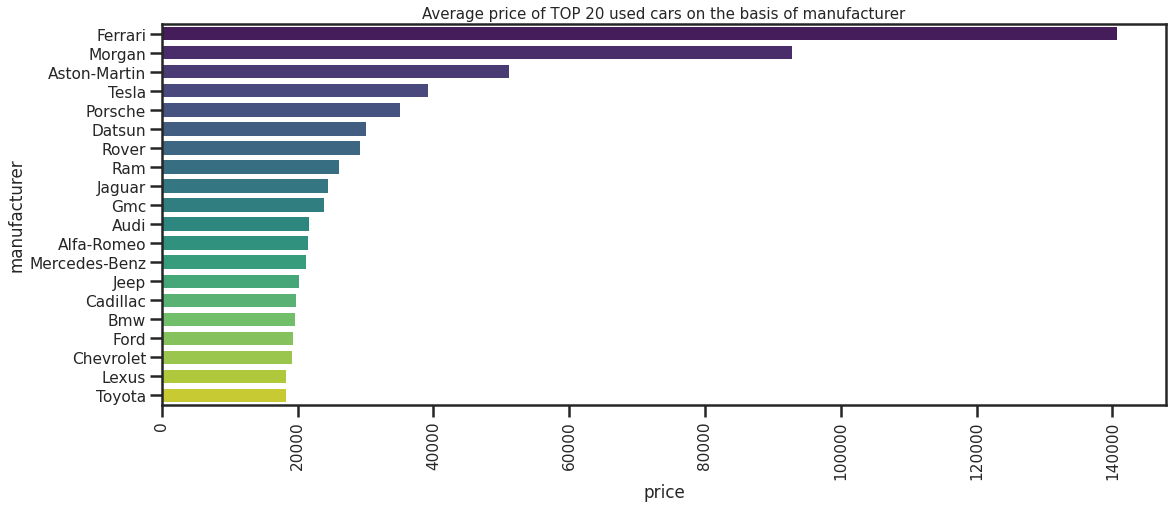

In [ ]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme(style = 'ticks', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = 0.7)

# barplot
sns.barplot(y = price_of_man.index, x = price_of_man['price'], data = price_of_man, palette = 'viridis')

_ = plt.xticks(rotation = 90,
               horizontalalignment = 'center',
               fontweight = 'light')

# set title
plt.title('Average price of TOP 20 used cars on the basis of manufacturer', fontsize = 15)

plt.show();

1. As we can see that ferrari, morgan, aston-martin, tesla, porsche etc are the top manufacturers customers are preferring when it comes to used cars.

# Price of cars at differnt region

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_region = pd.DataFrame(round(data_df.groupby('region')['price'].agg(np.mean), 2).nlargest(20))

price_in_region.head()

,price
region,
New Orleans,49480.65
Imperial County,40664.65
North Platte,37500.00
Cumberland Valley,31464.21
Yuma,31288.64


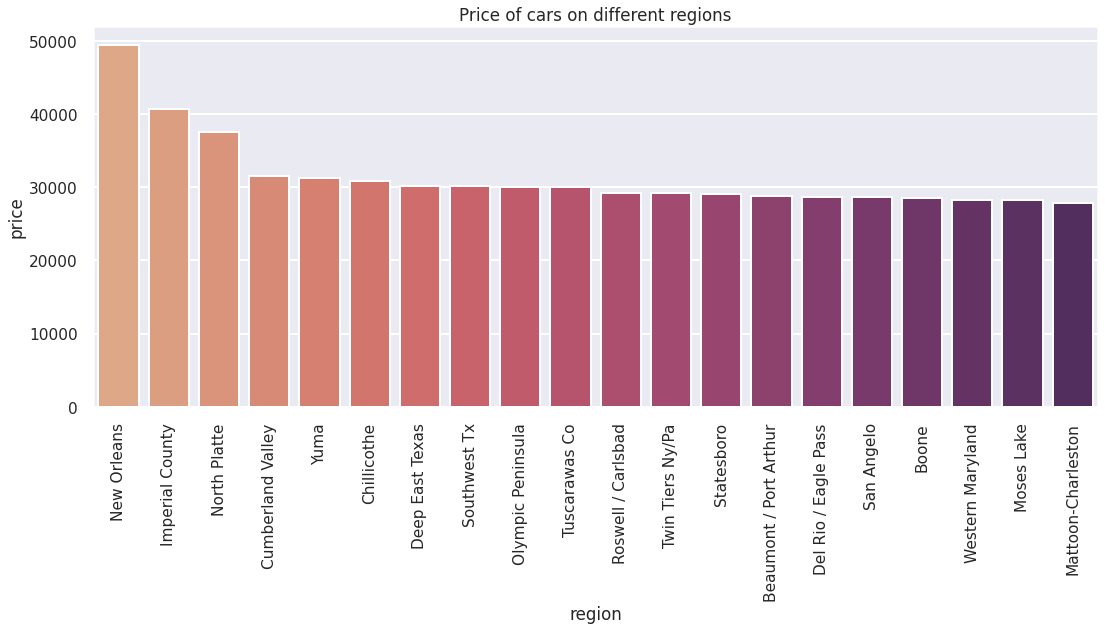

In [ ]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = 0.7)

# barplot
sns.barplot(y = price_in_region['price'], x = price_in_region.index, 
            data = price_in_region, palette = 'flare').set_title('Price of cars on different regions')

_ = plt.xticks(rotation  = 90,
               horizontalalignment = 'center',
               fontweight = 'light')



1 . As we can see that New orleans, Imperial County, North Platte, Yuma, Southwest TX etc are the regions where used cars are preferred by people on the basis of price.

# Prices of cars on the basis of condition

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
# price of cars on the basis of condition

price_in_cond = pd.DataFrame(round(data_df.groupby('condition')['price'].agg(np.mean), 2).sort_values(ascending = False))

price_in_cond

,price
condition,
new,21030.36
good,19359.57
like new,17907.31
excellent,13668.52
fair,3777.08
salvage,3297.01


In [ ]:
# number of cars with respect to condition

condition_count = pd.DataFrame(data_df.groupby('condition')['price'].count().sort_values(ascending = False))
condition_count

,price
condition,
good,160979
excellent,53383
like new,6368
fair,866
new,351
salvage,82


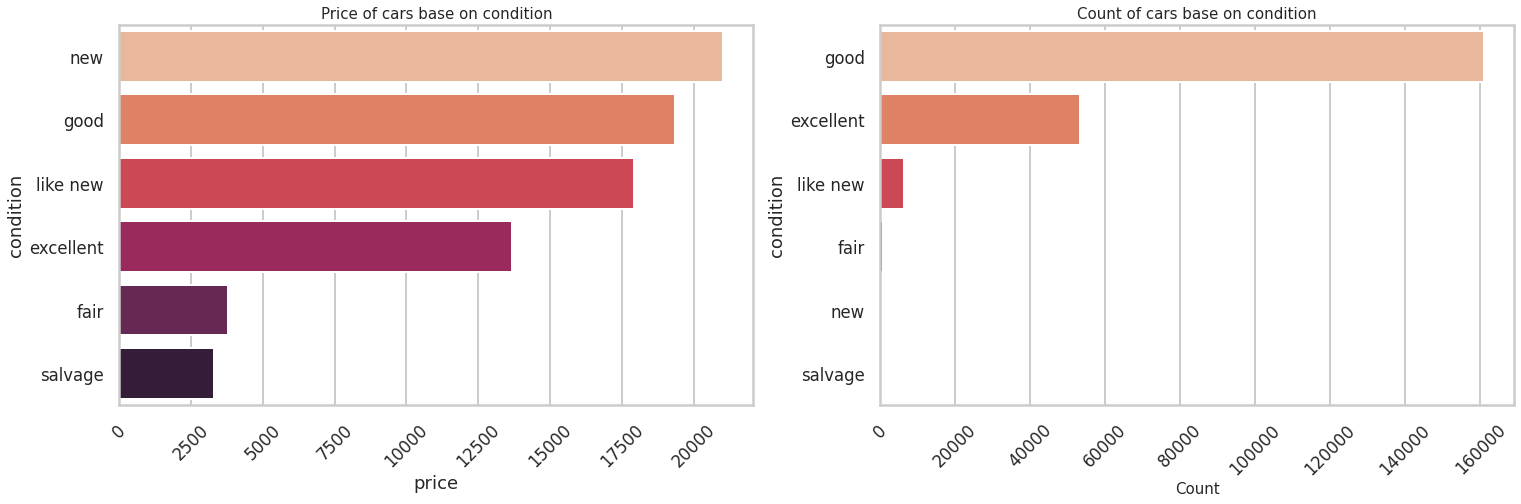

In [ ]:
sns.set( rc = {'figure.figsize' : ( 25, 7),  
               'axes.labelsize' : 12 })

# set theme
sns.set_theme(style = 'whitegrid', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = 0.75)

plt.subplot(1,2,1)

# barplot
sns.barplot(x = price_in_cond['price'], y = price_in_cond.index, data = price_in_cond, palette = 'rocket_r')

_ = plt.xticks(rotation = 45,
               horizontalalignment = 'center',
               fontweight = 'light')

# set title
plt.title('Price of cars base on condition', fontsize = 15)

plt.subplot(1,2,2)

# barplot
sns.barplot(x = condition_count['price'], y = condition_count.index, data = condition_count, palette = 'rocket_r')

_ = plt.xticks(rotation = 45,
               horizontalalignment = 'center',
               fontweight = 'light')

# set title
plt.title('Count of cars base on condition', fontsize = 15)

# x label
plt.xlabel('Count', fontsize = 15)

plt.show();

In [ ]:
data_df.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,53383.0,13668.517637,12304.446169,0.0,5990.00,10900.0,17995.00,204900.0
fair,866.0,3777.081986,6211.202146,0.0,1500.00,2550.0,4500.00,123456.0
good,160979.0,19359.573435,57386.809811,0.0,8450.00,16990.0,27997.00,22000000.0
like new,6368.0,17907.312343,14560.971804,0.0,8493.75,14995.0,24423.75,235000.0
new,351.0,21030.356125,20814.812392,0.0,6900.00,17625.0,29000.00,198750.0
salvage,82.0,3297.012195,3063.577718,100.0,1000.00,2500.0,4120.00,13500.0


1. From the above 2 graphs we can see that people prefer cars which are new irrespective of the price although their availablity in the market is less.
2. Also cars in excellent, like new, fair and salvage condition have a lower count which increase their price in the market.
3. Cars in good condition are stable in terms of count and their price.

## Price of cars based on cylinders

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_cyn = pd.DataFrame(round(data_df.groupby('cylinders')['price'].agg(np.mean).sort_values(ascending = False), 2))
price_cyn

,price
cylinders,
12 cylinders,29478.00
8 cylinders,24959.85
other,22527.11
6 cylinders,18091.00
3 cylinders,14221.10
10 cylinders,13681.09
4 cylinders,10890.11
5 cylinders,6856.18


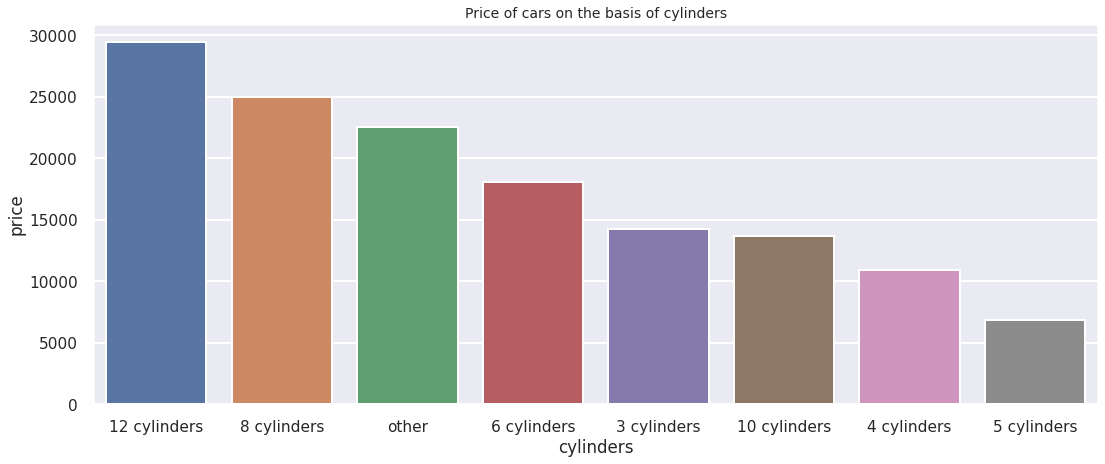

In [ ]:
plt.figure(figsize = (18, 7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, 
              font = 'sans-serif', font_scale = 0.7)

# barplot
sns.barplot(x = price_cyn.index, y = price_cyn['price'], data = price_cyn)

# title
plt.title('Price of cars on the basis of cylinders', fontsize = 14)

plt.show();


1. From the graph we can see that people mostly prefer cars with cylinders more than 6 compared to other type.
2. The category other include cylinders like more than 12.
3. The greater the number of cylinders the more is the performance of the cars.

# Range of price of used cars over the years

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_year = pd.DataFrame(data_df.groupby('year')['price'].agg(np.median).reset_index())
price_in_year

,year,price
0,1911,35950.0
1,1924,5700.0
2,1926,15988.0
3,1927,16995.0
4,1928,33749.5
...,...,...
86,2017,22990.0
87,2018,24995.0
88,2019,26900.0
89,2020,34750.5


In [ ]:
fig = px.line(price_in_year, x = 'year', y = 'price', title = ' Price of cars over the years')
fig.show()

1. From the graph we can see that there is a constant increase and decrease of price over the last century, where the peak at price is at the year 1957 which is 49.995k whereas the lowest price is at 1953 which is 4900.
2. Considering the 21st century the peak in the price is at 2020 33.99k whereas the lowest is at 2000 which is 4500.
2. From the year 2000 we can only the rise in the price of used cars and it decreases in the year 2021.

# Price of cars based on fuel consuption

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_fuel = pd.DataFrame(round(data_df.groupby('fuel')['price'].agg(np.mean), 2).sort_values(ascending = False).reset_index())
price_in_fuel

,fuel,price
0,diesel,28918.33
1,electric,24337.20
2,other,21019.68
3,gas,16960.43
4,hybrid,12728.68


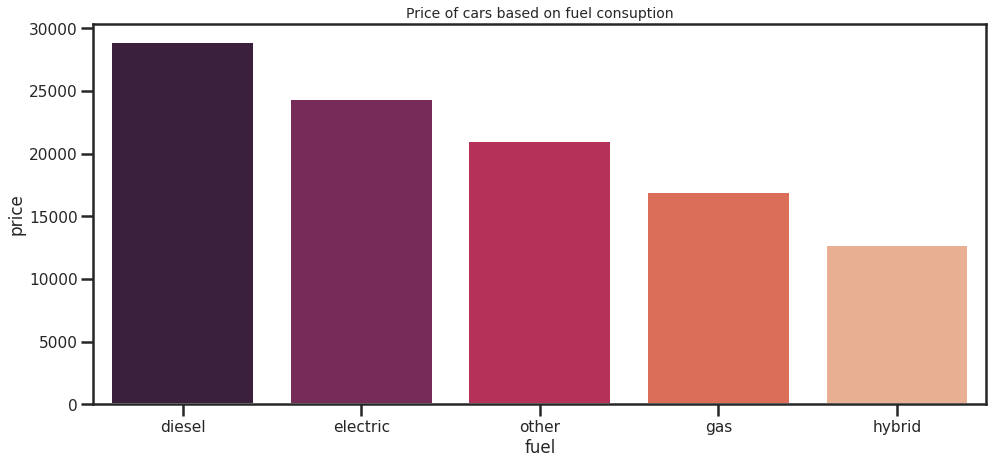

In [ ]:
plt.figure(figsize = (16,7))

# set theme
sns.set_theme(style = 'ticks', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = 0.7)

# barplot
sns.barplot(x = price_in_fuel['fuel'], y = price_in_fuel['price'], data = price_in_fuel, palette = 'rocket')

plt.title('Price of cars based on fuel consuption', fontsize = 14)

plt.show()

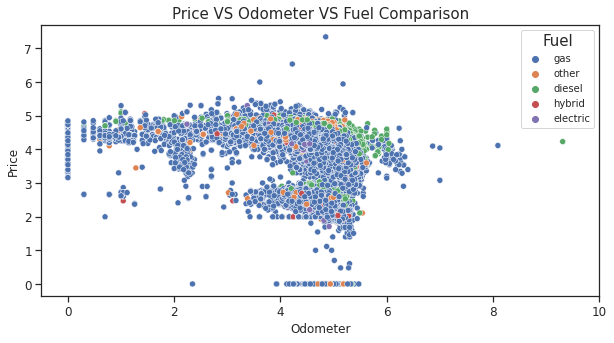

In [ ]:
plt.figure(figsize = (10,5))

# set theme
sns.set_theme(style = 'ticks', context = 'notebook', color_codes = True, # context paper, notebook, talk, poster
              font = 'sans-serif', font_scale = .7, palette = 'deep')

# scatterplot
ax = sns.scatterplot(x = np.log10(data_df['odometer']), y = np.log10(data_df['price']), hue = 'fuel',
                data = data_df, legend = 'auto')

# title
plt.title('Price VS Odometer VS Fuel Comparison', fontsize = 15)

# x limits
plt.xlim((-0.5, 10))

plt.xlabel('Odometer', fontsize = 12)
plt.ylabel('Price', fontsize = 12)

# fontsize of x and y parameter
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.legend(title = 'Fuel', fontsize=10, title_fontsize=15)

In [ ]:
data_df.groupby('fuel')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
diesel,13044.0,28918.326204,20265.687591,0.0,13495.0,28199.0,42000.0,159999.0
electric,1639.0,24337.195851,16795.441589,0.0,10990.0,18995.0,36990.0,199996.0
gas,192122.0,16960.430263,52521.200870,0.0,6998.0,14590.0,24986.0,22000000.0
hybrid,2951.0,12728.683158,9903.302588,0.0,6500.0,10995.0,16990.0,114970.0
other,12273.0,21019.680518,16050.382547,0.0,9495.0,18995.0,30990.0,109900.0


1. As we can see that diesal cars are mostly preferred by the customers compared to gas with respect to price.
2. We can also see that people also prefer electric cars.
3. The maximum price of fuel based car is gas which is 22000000 and the minimum price is for other which is 109900.

# Price of cars based on their status

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_status = pd.DataFrame(round(data_df.groupby('title_status')['price'].agg(np.mean), 2).sort_values(ascending = False))

price_in_status

,price
title_status,
lien,21770.07
clean,17945.18
salvage,14313.70
rebuilt,12050.60
missing,3792.27
parts only,3036.88


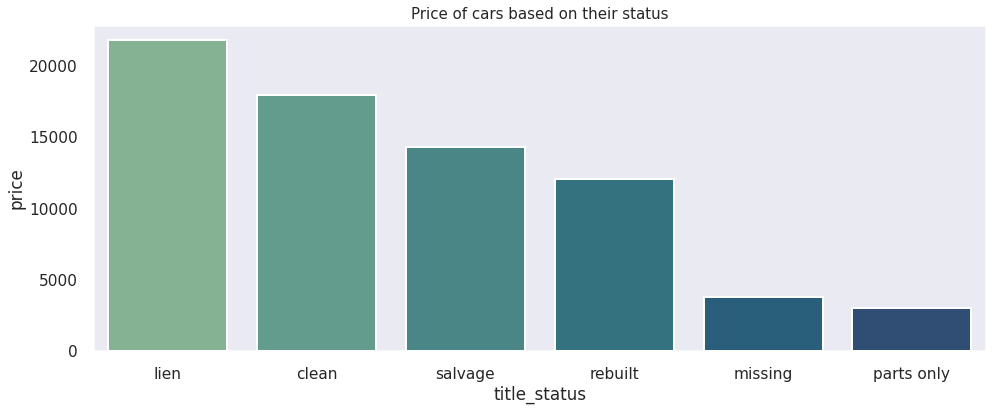

In [ ]:
plt.figure(figsize = (16,6))

# set theme
sns.set_theme(style = 'dark', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = 0.7)

# barplot
sns.barplot(x = price_in_status.index, y = price_in_status['price'], 
            data = price_in_status, palette = 'crest')

# title
plt.title('Price of cars based on their status', fontsize = 15)

plt.show();

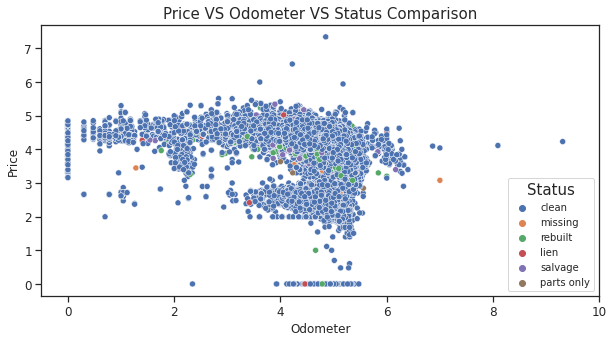

In [ ]:
plt.figure(figsize = (10,5))

# set theme
sns.set_theme(style = 'ticks', context = 'notebook', color_codes = True, # context paper, notebook, talk, poster
              font = 'sans-serif', font_scale = .7, palette = 'deep')

# scatterplot
ax = sns.scatterplot(x = np.log10(data_df['odometer']), y = np.log10(data_df['price']), hue = 'title_status',
                data = data_df, legend = 'auto')

# title
plt.title('Price VS Odometer VS Status Comparison', fontsize = 15)

# x limits
plt.xlim((-0.5, 10))

plt.xlabel('Odometer', fontsize = 12)
plt.ylabel('Price', fontsize = 12)

# fontsize of x and y parameter
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.legend(title = 'Status', fontsize=10, title_fontsize=15)

In [ ]:
data_df.groupby('title_status')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
title_status,,,,,,,,
clean,218991.0,17945.179724,49685.361922,0.0,7495.0,14995.0,25999.00,22000000.0
lien,315.0,21770.066667,14205.082242,0.0,12700.0,18500.0,29250.00,105000.0
missing,30.0,3792.266667,4564.174473,0.0,1125.0,1950.0,3873.75,17200.0
parts only,8.0,3036.875000,3021.923391,600.0,812.5,1425.0,4975.00,7995.0
rebuilt,1835.0,12050.596185,8796.552263,0.0,6785.0,9500.0,14999.00,169995.0
salvage,850.0,14313.701176,20342.275549,0.0,5999.0,9900.0,15998.00,219500.0


1. From the graph we can see that lien, clean are the type of cars preferred by people.
2. Also people prefer salvage cars over rebuilt ones.

# Price of cars based on transmission 

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_trans = pd.DataFrame(round(data_df.groupby('transmission')['price'].agg(np.mean), 2).sort_values(ascending = False).reset_index())
price_in_trans

,transmission,price
0,other,25337.61
1,automatic,16871.71
2,manual,14848.30


<Figure size 1296x432 with 0 Axes>

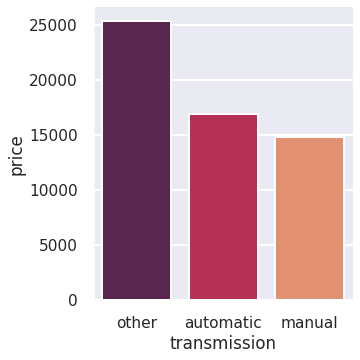

In [ ]:
plt.figure(figsize = (18,6))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = .7)

# barplot
sns.catplot(x = price_in_trans['transmission'], y = price_in_trans['price'], 
            data = price_in_trans, palette = 'rocket', kind = 'bar')

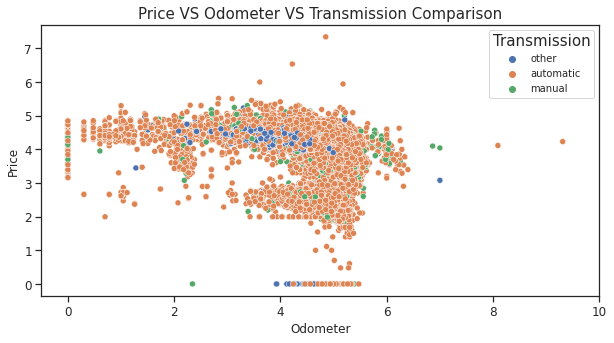

In [ ]:
plt.figure(figsize = (10,5))

# set theme
sns.set_theme(style = 'ticks', context = 'notebook', color_codes = True, # context paper, notebook, talk, poster
              font = 'sans-serif', font_scale = .7, palette = 'deep')

# scatterplot
ax = sns.scatterplot(x = np.log10(data_df['odometer']), y = np.log10(data_df['price']), hue = 'transmission',
                data = data_df, legend = 'auto')

# title
plt.title('Price VS Odometer VS Transmission Comparison', fontsize = 15)

# x limits
plt.xlim((-0.5, 10))

plt.xlabel('Odometer', fontsize = 12)
plt.ylabel('Price', fontsize = 12)

# fontsize of x and y parameter
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.legend(title = 'Transmission', fontsize=10, title_fontsize=15)

In [ ]:
data_df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,185098.0,16871.705707,53747.571824,0.0,6800.0,13900.0,23994.75,22000000.0
manual,8347.0,14848.297113,13807.487361,0.0,5498.0,11480.0,20590.00,199996.0
other,28584.0,25337.610481,10407.529297,0.0,17998.0,25990.0,31590.00,169995.0


In [ ]:
data_df[data_df['price'] == data_df['price'].max()]

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
174403,https://neworleans.craigslist.org/cto/d/coving...,New Orleans,https://neworleans.craigslist.org,22000000,2015,Toyota,tacoma,good,6 cylinders,gas,71000.0,clean,automatic,5TFJU4GN3FXO83134,fwd,mid-size,Truck,white,https://images.craigslist.org/00m0m_eYcrNNJIlX...,Nice reliable truck. Bought while living in Fl...,la,30.5661,-90.1098,2020-11-16T19:18:24-0600


1. From the graph we can see that other kinds of transmission i.e CVT(Continously variabe Transmission) is preferred followed by automatic and manual.

## Price of cars based on type

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_type = pd.DataFrame(round(data_df.groupby('type')['price'].agg(np.mean), 2).sort_values(ascending = False))
price_in_type

,price
type,
Pickup,27551.13
Truck,24028.82
Coupe,22351.68
Other,22318.12
Offroad,22312.64
Convertible,20689.95
Van,15950.72
Suv,15603.38
Bus,13128.88


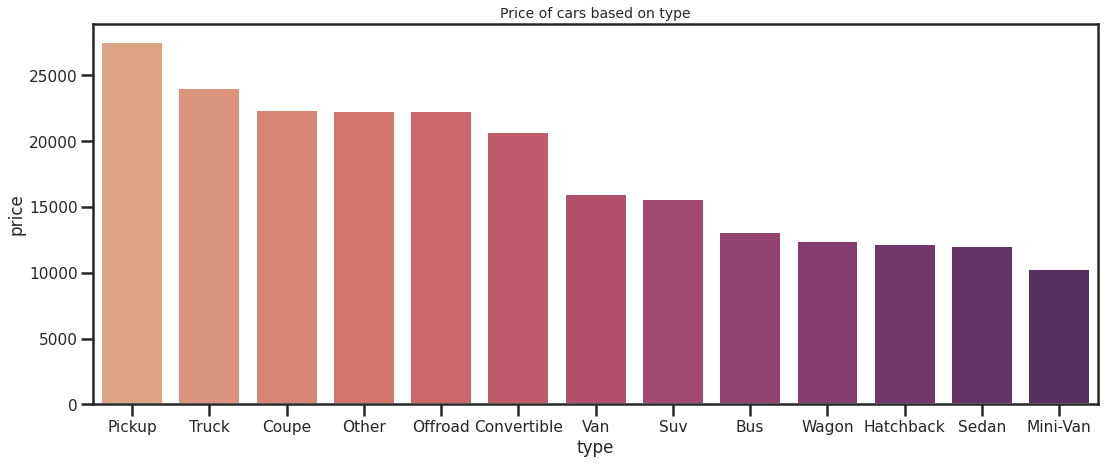

In [ ]:
plt.figure(figsize = (18,7))

# Set theme
sns.set_theme(style = 'ticks', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = .7)

# barplot
sns.barplot(x = price_in_type.index, y = price_in_type['price'],
            data = price_in_type, palette = 'flare')

# title
plt.title('Price of cars based on type', fontsize = 14)

plt.show();

1. From the graph we can see that Pickup, Truck, Coupe are the top preferred type whereas Hatchback, Sedan, Mini-van are the least preferred cars.

## Price of cars based on size

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
price_in_size = pd.DataFrame(round(data_df.groupby('size')['price'].agg(np.mean), 2).sort_values(ascending = False).reset_index())
price_in_size

,size,price
0,full-size,18667.52
1,sub-compact,13731.49
2,mid-size,12816.34
3,compact,9730.91


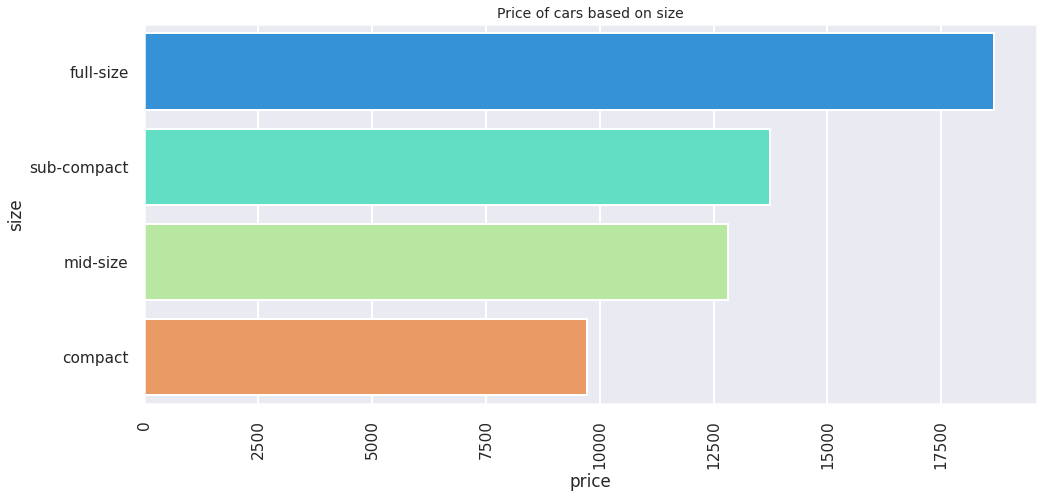

In [ ]:
plt.figure(figsize = (16,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
              font = 'sans-serif', font_scale = .7)

# barplot
sns.barplot(x = price_in_size['price'], y = price_in_size['size'], 
            data = price_in_size, palette = 'rainbow')

_ = plt.xticks(rotation = 90,
               horizontalalignment = 'center',
               fontweight = 'light')

# title
plt.title('Price of cars based on size', fontsize = 14)

plt.show();

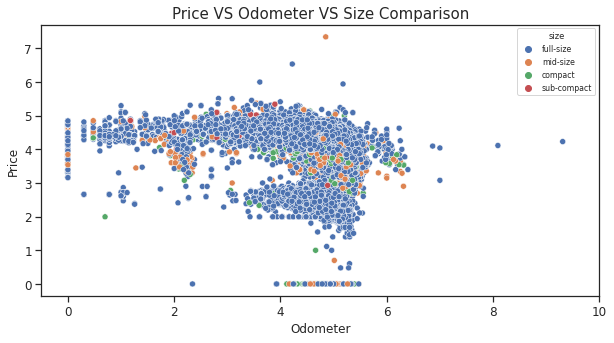

In [ ]:
plt.figure(figsize = (10,5))

# set theme
sns.set_theme(style = 'ticks', context = 'notebook', color_codes = True, # context paper, notebook, talk, poster
              font = 'sans-serif', font_scale = .7, palette = 'deep')

# scatterplot
ax = sns.scatterplot(x = np.log10(data_df['odometer']), y = np.log10(data_df['price']), hue = 'size',
                data = data_df)

# title
plt.title('Price VS Odometer VS Size Comparison', fontsize = 15)

# x limits
plt.xlim((-0.5, 10))

plt.xlabel('Odometer', fontsize = 12)
plt.ylabel('Price', fontsize = 12)

# fontsize of x and y parameter
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)


1. From the graph we can see that people prefer full size cars compared to other types even though they have a higher price.

## Ratio of differnt type of  drive 

In [ ]:
data_df.head()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,35990,2010,Chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,full-size,Other,white,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,https://auburn.craigslist.org/cto/d/auburn-201...,Auburn,https://auburn.craigslist.org,7500,2014,Hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,full-size,Sedan,white,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600
5,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,29590,2016,Toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,4wd,full-size,Pickup,red,https://images.craigslist.org/00k0k_9nUNSlCBLM...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-01T07:27:25-0600
6,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,39990,2012,Ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,full-size,Coupe,blue,https://images.craigslist.org/01515_fL9MWURsaZ...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-30T13:34:00-0600
7,https://auburn.craigslist.org/ctd/d/auburn-uni...,Auburn,https://auburn.craigslist.org,41990,2012,Chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,full-size,Coupe,red,https://images.craigslist.org/00p0p_eXZbgunMDy...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-11-29T07:39:33-0600


In [ ]:
data_df['drive'].value_counts().index

Index(['4wd', 'fwd', 'rwd'], dtype='object')

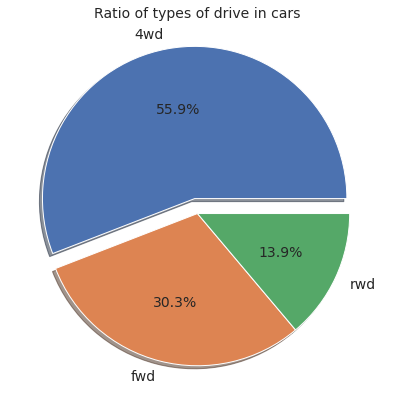

In [ ]:
plt.figure(figsize = (16,7))

labels = data_df['drive'].value_counts(sort = True).index # labels for the plot
size = data_df['drive'].value_counts(sort = True) # values for the plot

# pie chart
plt.pie(size, labels = labels, autopct = '%1.1f%%', shadow = True, 
        textprops = {'fontsize' : 14}, explode = [0.1, 0, 0])

# title for the plot
plt.title('Ratio of types of drive in cars', fontsize = 14)

plt.show();

## CONCLUSION

1. Initially the dataset has 458213 rows and 26 columns.
2. After removing null values the dataset contains 222029 rows and 24 columns.
3. Ferrari, Morgan, Aston-Martin, Tesla, Porsche etc are the top manufacturers customers are preferring when it comes to used cars.
4. New orleans, Imperial County, North Platte, Yuma, Southwest TX etc are the regions where used cars are preferred by people on the basis of price.
5. People prefer cars which are new irrespective of the price although their availablity in the market is less. Also cars in excellent, like new, fair and salvage condition have a lower count which increase their price in the market. Cars in good condition are stable in terms of count and their price.
6. People mostly prefer cars with cylinders more than 6 compared to other type. The category other include cylinders like more than 12. The greater the number of cylinders the more is the performance of the cars.
7. Comparing price across the dataset we can see that there is a constant increase and decrease of price over the last century, where the peak at price is at the year 1957 which is 49.995k whereas the lowest price is at 1953 which is 4900.
8. Considering the 21st century the peak in the price is at 2020 33.99k whereas the lowest is at 2000 which is 4500. From the year 2000 we can only the rise in the price of used cars and it decreases in the year 2021.
9.  As we can see that diesal cars are mostly preferred by the customers compared to gas with respect to price. We can also see that people also prefer electric cars.
The maximum price of fuel based car is gas which is 22000000 and the minimum price is for other which is 109900.
10. Lien, clean are the type of cars preferred by people. Also people prefer salvage cars over rebuilt ones.
11. People prefer other kinds of transmission i.e CVT(Continously variabe Transmission) followed by automatic and manual.
12. Pickup, Truck, Coupe are the top preferred type whereas Hatchback, Sedan, Mini-van are the least preferred cars on the basis of types.
13. People prefer full size cars compared to other types even though they have a higher price.